# ----------------------------------------
# | Claasification for Chemo  |
# ----------------------------------------


## Importing libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [18]:
df= pd.read_csv('col.csv')
df.head()

,ER+,PR+,MRI1,LD1,NO of node,node coded,tomur location,tumor stage,node,M,stage,hermonal,chemo,surgery,ln,censor
0,0,1,yes,4.00,5,Positive,left_low,T2,N3,M0,Stage IIIC,0,1,0,0,0
1,1,1,yes,7.95,0,Negative,right_up,T3,N0,M0,Stage IIA,1,0,1,1,1
2,1,1,yes,1.10,1,Positive,left_low,T1,N1,M0,Stage IIIB,1,0,0,0,0
3,0,0,yes,6.23,0,Negative,left_up,T3,N0,M0,Stage IIB,0,1,0,0,0
4,1,1,yes,7.70,6,Positive,right_low,T3,N3,M0,Stage IIIC,1,0,0,0,0


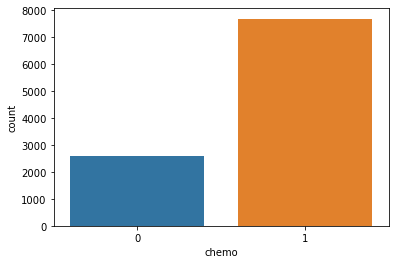

In [19]:
sns.countplot('chemo', data=df)

## *Frist: Data prepration :

In [3]:
replace_map = {'stage': {'IA': 1, 'IB': 2, 'IIA': 3, 'IIB': 4,
                                  'IIC': 5, 'IIIA': 6, 'IIIB': 7 , 'IIIC': 8 , 'IV': 9}}
labels = df['stage'].astype('category').cat.categories.tolist()
replace_map_comp = {'stage' : {k: v for k,v in zip(labels,list(range(1,len(labels)+1)))}}

df_copy = df.copy()
df_copy.replace(replace_map_comp, inplace=True)
df_lc = df_copy.copy()
df_lc['stage'] = df_lc['stage'].astype('category')

In [4]:
replace_map = {'tumor stage': {'T1': 1, 'T2': 2, 'T3': 3, 'T4': 4}}
labels = df['tumor stage'].astype('category').cat.categories.tolist()

replace_map_comp = {'tumor stage' : {k: v for k,v in zip(labels,list(range(1,len(labels)+1)))}}
df_lc2 = df_lc.copy()
df_lc2.replace(replace_map_comp, inplace=True)
df_lc3 = df_lc2.copy()
df_lc3['tumor stage'] = df_lc3['tumor stage'].astype('category')

In [5]:
replace_map = {'tomur location': {'left_low': 1, 'right_up': 2, 'left_up': 3, 'right_low': 4,
                                  'central': 5}}
labels = df_lc3['tomur location'].astype('category').cat.categories.tolist()
replace_map_comp = {'tomur location' : {k: v for k,v in zip(labels,list(range(1,len(labels)+1)))}}
df_lc4 = df_lc3.copy()
df_lc4.replace(replace_map_comp, inplace=True)
df_lc5 = df_lc4.copy()
df_lc5['tomur location'] = df_lc5['tomur location'].astype('category')

In [6]:
replace_map = {'node coded': {'Negative': 0, 'Positive': 1}}
labels = df_lc5['node coded'].astype('category').cat.categories.tolist()
replace_map_comp = {'node coded' : {k: v for k,v in zip(labels,list(range(1,len(labels)+1)))}}
df_lc6 = df_lc5.copy()
df_lc6.replace(replace_map_comp, inplace=True)
df_lc7 = df_lc6.copy()
df_lc7['node coded'] = df_lc7['node coded'].astype('category')


In [7]:
replace_map = {'MRI1': {'yes': 0, 'no': 1}}
labels = df_lc7['MRI1'].astype('category').cat.categories.tolist()
replace_map_comp = {'MRI1' : {k: v for k,v in zip(labels,list(range(1,len(labels)+1)))}}
df_lc8 = df_lc7.copy()
df_lc8.replace(replace_map_comp, inplace=True)
df_lc9 = df_lc8.copy()
df_lc9['MRI1'] = df_lc9['MRI1'].astype('category')


In [8]:
replace_map = {'node ': {'N0': 1, 'N1': 2, 'N2': 3, 'T3': 4}}
labels = df['node '].astype('category').cat.categories.tolist()
replace_map_comp = {'node ' : {k: v for k,v in zip(labels,list(range(1,len(labels)+1)))}}
df_lc10 = df_lc9.copy()
df_lc10.replace(replace_map_comp, inplace=True)
df_lc11 = df_lc10.copy()
df_lc11['node '] = df_lc11['node '].astype('category')


In [9]:
replace_map = {'M': {'M0': 1, 'M1': 2}}
labels = df_lc11['M'].astype('category').cat.categories.tolist()
replace_map_comp = {'M' : {k: v for k,v in zip(labels,list(range(1,len(labels)+1)))}}
df_lc12 = df_lc11.copy()
df_lc12.replace(replace_map_comp, inplace=True)
df_lc13 = df_lc12.copy()
df_lc13['M'] = df_lc13['M'].astype('category')

In [10]:
df_lc13['hermonal'] = df_lc13['hermonal'].astype('category')

df_lc13['chemo'] = df_lc13['chemo'].astype('category')

df_lc13['surgery'] = df_lc13['surgery'].astype('category')

df_lc13['ln'] = df_lc13['ln'].astype('category')

df_lc13['censor'] = df_lc13['censor'].astype('category')

df_lc13['NO of node'] = df_lc13['NO of node'].astype('category')

df_lc13['ER+'] = df_lc13['ER+'].astype('category')

df_lc13['PR+'] = df_lc13['PR+'].astype('category')
print(df_lc13.dtypes)

ER+               category
PR+               category
MRI1              category
LD1                float64
NO of node        category
node coded        category
tomur location    category
tumor stage       category
node              category
M                 category
stage             category
hermonal          category
chemo             category
surgery           category
ln                category
censor            category
dtype: object


## **Second:  Preprocessing
## (with StandardScale)

In [11]:
from sklearn.preprocessing import StandardScaler
df_drop_target=df_lc13.drop('chemo',axis=1)
scaler =StandardScaler()
scaler.fit(df_drop_target)
scaled_features= scaler.transform(df_drop_target)
df_feat=pd.DataFrame(scaled_features,columns=df_drop_target.columns)


# 1- Logistic regression
## ***Third : Train Test split

In [12]:
x= df_feat
y=df_lc13['chemo']
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)

In [13]:
from sklearn.linear_model import LogisticRegression
logModel= LogisticRegression()
logModel.fit(x_train,y_train)
predictions= logModel.predict(x_test)

# Evaluation 

In [14]:
from sklearn.metrics import classification_report
print('classification_report: ')
print(classification_report(y_test,predictions))

from sklearn.metrics import confusion_matrix
print('confusion_matrix: ')
confusion_matrix(y_test,predictions)

classification_report: 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       888
           1       1.00      1.00      1.00      2511

    accuracy                           1.00      3399
   macro avg       1.00      1.00      1.00      3399
weighted avg       1.00      1.00      1.00      3399

confusion_matrix: 


array([[ 888,    0],
       [   0, 2511]], dtype=int64)

# 3-Decision Tree 
## Train one Tree:

In [15]:
x= df_feat
y=df_lc13['chemo']
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=80)

In [16]:
from sklearn.tree import DecisionTreeClassifier
dtree= DecisionTreeClassifier()
dtree.fit(x_train,y_train)
predictions3=dtree.predict(x_test)

## Evaluation 


In [17]:
from sklearn.metrics import classification_report
print(classification_report(y_test,predictions3))
print('\n')
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,predictions)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       838
           1       1.00      1.00      1.00      2561

    accuracy                           1.00      3399
   macro avg       1.00      1.00      1.00      3399
weighted avg       1.00      1.00      1.00      3399





array([[ 196,  642],
       [ 692, 1869]], dtype=int64)

## Train Random Forest